Dataset Created Successfully!

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                  15                      39
1           2                  16                      81
2           3                  17                       6
3           4                  18                      77
4           5                  19                      40

Loaded Dataset:
   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                  15                      39
1           2                  16                      81
2           3                  17                       6
3           4                  18                      77
4           5                  19                      40

Feature Matrix (Annual Income & Spending Score):
[[15 39]
 [16 81]
 [17  6]
 [18 77]
 [19 40]]


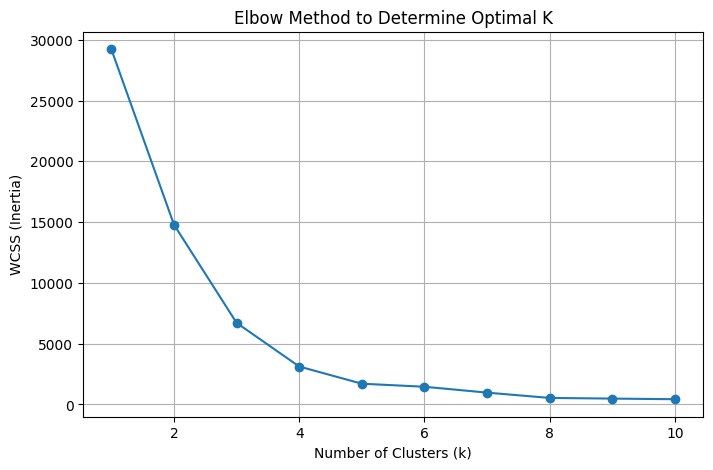


Cluster Labels:
[4 0 2 0 4 0 2 0 2 0 2 3 3 1 1 3 1 1 3 3]


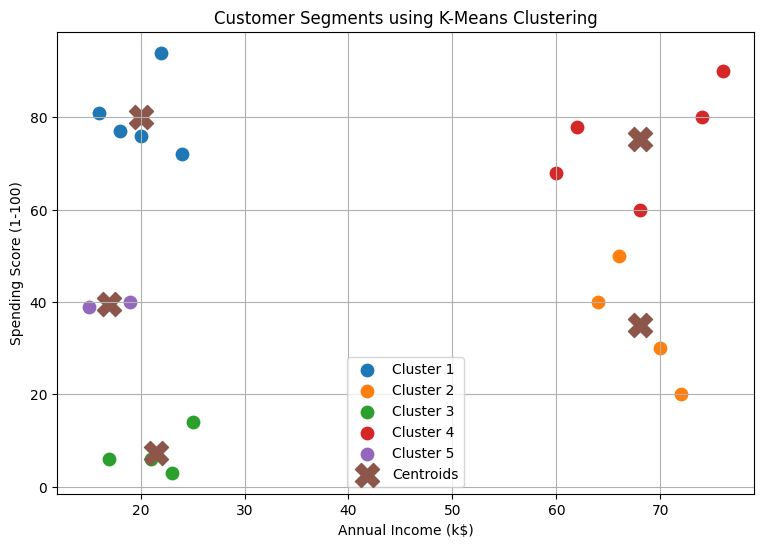


--- Cluster Insights ---

Cluster 1:
       Annual Income (k$)  Spending Score (1-100)
count            5.000000                5.000000
mean            20.000000               80.000000
std              3.162278                8.455767
min             16.000000               72.000000
25%             18.000000               76.000000
50%             20.000000               77.000000
75%             22.000000               81.000000
max             24.000000               94.000000

Cluster 2:
       Annual Income (k$)  Spending Score (1-100)
count            4.000000                4.000000
mean            68.000000               35.000000
std              3.651484               12.909944
min             64.000000               20.000000
25%             65.500000               27.500000
50%             68.000000               35.000000
75%             70.500000               42.500000
max             72.000000               50.000000

Cluster 3:
       Annual Income (k$)  Spending Sc

In [4]:
# -------------------------------------------------------
# Ex No: 13 - Implementation of K-Means Clustering
# -------------------------------------------------------

# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# -------------------------------------------------------
# Step 2: Create Dataset (CSV auto-created in Colab)
# -------------------------------------------------------

data = {
    'CustomerID': range(1, 21),
    'Annual Income (k$)': [15,16,17,18,19,20,21,22,23,24,25,60,62,64,66,68,70,72,74,76],
    'Spending Score (1-100)': [39,81,6,77,40,76,6,94,3,72,14,68,78,40,50,60,30,20,80,90]
}

df = pd.DataFrame(data)
df.to_csv("Mall_Customers.csv", index=False)

print("Dataset Created Successfully!\n")
print(df.head())

# -------------------------------------------------------
# Step 3: Load Dataset
# -------------------------------------------------------

dataset = pd.read_csv("Mall_Customers.csv")
print("\nLoaded Dataset:")
print(dataset.head())

# -------------------------------------------------------
# Step 4: Feature Selection (Income & Spending Score)
# -------------------------------------------------------

X = dataset.iloc[:, [1, 2]].values
print("\nFeature Matrix (Annual Income & Spending Score):")
print(X[:5])

# -------------------------------------------------------
# Step 5: Elbow Method to find optimal K
# -------------------------------------------------------

wcss = []   # Within-Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid()
plt.show()

# -------------------------------------------------------
# Step 6: Apply K-Means (Choose K = 5 based on elbow)
# -------------------------------------------------------

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

print("\nCluster Labels:")
print(y_kmeans)

# -------------------------------------------------------
# Step 7: Visualizing the Clusters
# -------------------------------------------------------

plt.figure(figsize=(9,6))

# cluster 0
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, label='Cluster 1')
# cluster 1
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, label='Cluster 2')
# cluster 2
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=80, label='Cluster 3')
# cluster 3
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=80, label='Cluster 4')
# cluster 4
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=80, label='Cluster 5')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, marker='X', label='Centroids')

plt.title("Customer Segments using K-Means Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid()
plt.show()

# -------------------------------------------------------
# Step 8: Basic Insights
# -------------------------------------------------------

print("\n--- Cluster Insights ---")
for i in range(5):
    group = dataset[y_kmeans == i]
    print(f"\nCluster {i+1}:")
    print(group[['Annual Income (k$)', 'Spending Score (1-100)']].describe())